<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass7/bdm/RAM/library_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Project Title -- Air Pollution Index (API) in Malaysia

Data from 2005 to 2017 are retrieved from data.gov.my under MOSTI, DOE and KeTSA. The data is licensed under Creative Commons Attribution and Open Definition 2.1.

The data from 2018 to current date are retrieved directly from APIMS website. Data might still be under copyright (unclear) but it's safe to assume the data will eventually be released under the same license as above.

The libraries used in this proect include Pandas, NumPy, Matplotlib, Seaborn. Automated EDA tools chosen are Pandas-Profiling, DataPrep and SweetVitz.

Project Team:

| Name          | Matric Number  | Task            |
| ------------- | -------------- | --------------- |
| MOHAMMED RAZA ASFAK CHIDIMAR     | MCS231004       | Case Study 1   : Step by step EDA          |
| AYAZ RAHMAN BHUIYAN    | MCS232001        | Case Study 2a : Pandas-Profiling          |
| MUSAB IBNE AHMAD  | MCS231017        | Case Study 2b : DataPrep          |
| HUSSEIN YUSUF SHEIKH MOHAMED   | MCS231024       | Case Study 2c :  SweetViz          |



#Case Study 1: Step by Step EDA

##Import Necessary Libraries

In [ ]:
import pandas as pd

## Download the Dataset & Load It into a Data Frame



The dataset can be downloaded from https://www.kaggle.com/datasets/ynshung/malaysia-air-pollution-index.

The dataset was then uploaded into github. The raw link was then able to link to google colab  for data analysis.

Define the data frame as **df**. \
**pd.read_csv()** reads the CSV file and creates a Pandas DataFrame from it.\
**df.shape** is used to understand the structure of the data where:\
num_rows, num_columns = **df.shape**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/drshahizan/Python_EDA/main/assignment/ass2/bdm/RAM/APIMS-final.csv")
df.shape

(71459, 66)

**df.iloc()** to remove the rows, because we have 70000+ rows and we want to reduce data to 20000 rows only for now.

**df.reset_index()** to reseting the index after removing rows

In [ ]:
df = df.iloc[51459:]
df.reset_index(drop=True, inplace=True)

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
output_folder_drive = '/content/drive/MyDrive/'

output_file_path_drive = os.path.join(output_folder_drive, 'apims-20kdata.csv')
df.to_csv(output_file_path_drive, index=False)

print(f"Cleaned data saved to {output_file_path_drive}")


Cleaned data saved to /content/drive/MyDrive/apims-20kdata.csv


**df.head()** shows the first few rows of data frame. By default, it displays the first 5 rows.

**df.info()** is particularly useful for quickly understanding the structure of the dataset, checking for missing values, and assessing the data types of each column.

**df.describe()** generates descriptive statistics for the numeric columns only in the data frame. We can use **df.describe(include='all')** if want to include all columns(including non-numeric).



In [ ]:
df.head()

Time  Alor Gajah  Alor Setar  Balik Pulau  Balok Baru Kuantan  \
0  2020-01-24 12:00        28.0        39.0         56.0                40.0   
1  2020-01-24 13:00        28.0        40.0         56.0                41.0   
2  2020-01-24 14:00        29.0        40.0         56.0                41.0   
3  2020-01-24 15:00        30.0        41.0         56.0                41.0   
4  2020-01-24 16:00        32.0        43.0         55.0                42.0   

   Bandaraya Melaka  Banting  Batu Muda  Batu Pahat  Besut  ...  Sibu  \
0              33.0     52.0       56.0        25.0   44.0  ...  52.0   
1              33.0     52.0       56.0        26.0   44.0  ...  51.0   
2              32.0     53.0       56.0        27.0   45.0  ...  51.0   
3              33.0     53.0       55.0        27.0   44.0  ...  51.0   
4              33.0     53.0       55.0        27.0   44.0  ...  50.0   

   Sri Aman  Sungai Petani  Taiping  Tanah Merah  Tangkak  Tanjung Malim  \
0      30.0           48.0     46.0         58.0     38.0           17.0   
1      30.0           47.0     46.0         59.0     39.0           17.0   
2      30.0           47.0     46.0         59.0     40.0           19.0   
3      30.0           47.0     45.0         58.0     40.0           22.0   
4      29.0           48.0     44.0         58.0     41.0           26.0   

   Tasek Ipoh  Tawau  Temerloh  
0        56.0   44.0      52.0  
1        56.0   43.0      52.0  
2        56.0   42.0      52.0  
3        56.0   43.0      52.0  
4        55.0   42.0      52.0  

[5 rows x 66 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 66 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Time                    20000 non-null  object 
 1   Alor Gajah              19925 non-null  float64
 2   Alor Setar              19979 non-null  float64
 3   Balik Pulau             19956 non-null  float64
 4   Balok Baru Kuantan      19978 non-null  float64
 5   Bandaraya Melaka        19967 non-null  float64
 6   Banting                 19708 non-null  float64
 7   Batu Muda               19936 non-null  float64
 8   Batu Pahat              19917 non-null  float64
 9   Besut                   19970 non-null  float64
 10  Bintulu                 19957 non-null  float64
 11  Bukit Rambai            19919 non-null  float64
 12  Cheras                  19900 non-null  float64
 13  Indera Mahkota Kuantan  19930 non-null  float64
 14  Jerantut                19738 non-null

In [ ]:
df.describe()

Alor Gajah    Alor Setar   Balik Pulau  Balok Baru Kuantan  \
count  19925.00000  19979.000000  19956.000000        19978.000000   
mean      47.16271     43.824115     48.783975           44.231154   
std       13.00564     14.409354     13.930884           11.372505   
min       12.00000     12.000000     11.000000           11.000000   
25%       37.00000     32.000000     38.000000           36.000000   
50%       51.00000     45.000000     52.000000           45.000000   
75%       56.00000     54.000000     58.000000           53.000000   
max       88.00000     96.000000    125.000000          139.000000   

       Bandaraya Melaka       Banting     Batu Muda    Batu Pahat  \
count      19967.000000  19708.000000  19936.000000  19917.000000   
mean          48.853258     57.547443     55.318820     43.215193   
std           11.133550     12.519028      8.485067     12.889378   
min           15.000000     18.000000     18.000000     11.000000   
25%           41.000000     52.000000     52.000000     33.000000   
50%           52.000000     57.000000     56.000000     44.000000   
75%           56.000000     64.000000     60.000000     53.000000   
max          101.000000    167.000000     90.000000     97.000000   

              Besut       Bintulu  ...          Sibu      Sri Aman  \
count  19970.000000  19957.000000  ...  19961.000000  19980.000000   
mean      42.668603     44.489853  ...     33.187616     31.871622   
std       12.990185     12.852267  ...     11.951804     12.344776   
min       11.000000     13.000000  ...      9.000000      8.000000   
25%       32.000000     34.000000  ...     24.000000     22.000000   
50%       44.000000     46.000000  ...     31.000000     29.000000   
75%       53.000000     54.000000  ...     40.000000     40.000000   
max       79.000000     79.000000  ...    152.000000     84.000000   

       Sungai Petani       Taiping   Tanah Merah       Tangkak  Tanjung Malim  \
count   19979.000000  19933.000000  19943.000000  19881.000000   19979.000000   
mean       48.946894     48.433904     49.927192     47.917610      36.073177   
std        13.795970     13.450193     14.299833     10.961348      12.758131   
min        13.000000     11.000000     10.000000     16.000000       7.000000   
25%        40.000000     39.000000     40.000000     41.000000      26.000000   
50%        52.000000     52.000000     53.000000     50.000000      35.000000   
75%        58.000000     58.000000     59.000000     55.000000      46.000000   
max        95.000000     88.000000     98.000000    160.000000     101.000000   

         Tasek Ipoh         Tawau      Temerloh  
count  19949.000000  19906.000000  19953.000000  
mean      54.077999     30.970863     47.612139  
std        9.604190      9.864806     12.881534  
min       16.000000     10.000000     10.000000  
25%       51.000000     24.000000     39.000000  
50%       55.000000     29.000000     52.000000  
75%       60.000000     36.000000     56.000000  
max       90.000000     74.000000     91.000000  

[8 rows x 65 columns]

In [ ]:
df.describe(include='all')

Time   Alor Gajah    Alor Setar   Balik Pulau  \
count              20000  19925.00000  19979.000000  19956.000000   
unique             20000          NaN           NaN           NaN   
top     2020-01-24 12:00          NaN           NaN           NaN   
freq                   1          NaN           NaN           NaN   
mean                 NaN     47.16271     43.824115     48.783975   
std                  NaN     13.00564     14.409354     13.930884   
min                  NaN     12.00000     12.000000     11.000000   
25%                  NaN     37.00000     32.000000     38.000000   
50%                  NaN     51.00000     45.000000     52.000000   
75%                  NaN     56.00000     54.000000     58.000000   
max                  NaN     88.00000     96.000000    125.000000   

        Balok Baru Kuantan  Bandaraya Melaka       Banting     Batu Muda  \
count         19978.000000      19967.000000  19708.000000  19936.000000   
unique                 NaN               NaN           NaN           NaN   
top                    NaN               NaN           NaN           NaN   
freq                   NaN               NaN           NaN           NaN   
mean             44.231154         48.853258     57.547443     55.318820   
std              11.372505         11.133550     12.519028      8.485067   
min              11.000000         15.000000     18.000000     18.000000   
25%              36.000000         41.000000     52.000000     52.000000   
50%              45.000000         52.000000     57.000000     56.000000   
75%              53.000000         56.000000     64.000000     60.000000   
max             139.000000        101.000000    167.000000     90.000000   

          Batu Pahat         Besut  ...          Sibu      Sri Aman  \
count   19917.000000  19970.000000  ...  19961.000000  19980.000000   
unique           NaN           NaN  ...           NaN           NaN   
top              NaN           NaN  ...           NaN           NaN   
freq             NaN           NaN  ...           NaN           NaN   
mean       43.215193     42.668603  ...     33.187616     31.871622   
std        12.889378     12.990185  ...     11.951804     12.344776   
min        11.000000     11.000000  ...      9.000000      8.000000   
25%        33.000000     32.000000  ...     24.000000     22.000000   
50%        44.000000     44.000000  ...     31.000000     29.000000   
75%        53.000000     53.000000  ...     40.000000     40.000000   
max        97.000000     79.000000  ...    152.000000     84.000000   

        Sungai Petani       Taiping   Tanah Merah       Tangkak  \
count    19979.000000  19933.000000  19943.000000  19881.000000   
unique            NaN           NaN           NaN           NaN   
top               NaN           NaN           NaN           NaN   
freq              NaN           NaN           NaN           NaN   
mean        48.946894     48.433904     49.927192     47.917610   
std         13.795970     13.450193     14.299833     10.961348   
min         13.000000     11.000000     10.000000     16.000000   
25%         40.000000     39.000000     40.000000     41.000000   
50%         52.000000     52.000000     53.000000     50.000000   
75%         58.000000     58.000000     59.000000     55.000000   
max         95.000000     88.000000     98.000000    160.000000   

        Tanjung Malim    Tasek Ipoh         Tawau      Temerloh  
count    19979.000000  19949.000000  19906.000000  19953.000000  
unique            NaN           NaN           NaN           NaN  
top               NaN           NaN           NaN           NaN  
freq              NaN           NaN           NaN           NaN  
mean        36.073177     54.077999     30.970863     47.612139  
std         12.758131      9.604190      9.864806     12.881534  
min          7.000000     16.000000     10.000000     10.000000  
25%         26.000000     51.000000     24.000000     39.000000  
50%         35.000000     

## Data Preparation and Cleaning

After understand our data, we need to clean it before we analyse.



###1. Text Cleaning

we are converting our column name into lower case using **str.lower()**


In [ ]:
df.columns = df.columns.str.lower()
df.columns

Index(['time', 'alor gajah', 'alor setar', 'balik pulau', 'balok baru kuantan',
       'bandaraya melaka', 'banting', 'batu muda', 'batu pahat', 'besut',
       'bintulu', 'bukit rambai', 'cheras', 'indera mahkota kuantan',
       'jerantut', 'kangar', 'kapit', 'kemaman', 'keningau', 'kimanis',
       'klang', 'kluang', 'kota bharu', 'kota kinabalu', 'kota tinggi',
       'kuala selangor', 'kuala terengganu', 'kuching', 'kulim', 'labuan',
       'langkawi', 'larkin', 'limbang', 'minden', 'miri', 'muar', 'mukah',
       'nilai', 'paka', 'pasir gudang', 'pegoh ipoh', 'pengerang',
       'petaling jaya', 'port dickson', 'putrajaya', 'rompin', 'samalaju',
       'samarahan', 'sandakan', 'sarikei', 'seberang jaya', 'seberang perai',
       'segamat', 'seremban', 'seri manjung', 'shah alam', 'sibu', 'sri aman',
       'sungai petani', 'taiping', 'tanah merah', 'tangkak', 'tanjung malim',
       'tasek ipoh', 'tawau', 'temerloh'],
      dtype='object')

In our dataset no column has string values, and column names are also already clean, but we are if we had any text data column we would have performed this steps **Just example of code below**

In [ ]:
# Assuming 'text_column' is the column containing text data
text_column_name = 'text_column'

# Display a few rows of the original text column
print("Original Text Column:")
print(df[text_column_name].head())

# Text Cleaning Steps

# 1. Lowercasing
df[text_column_name] = df[text_column_name].str.lower()

# 2. Removing Punctuation
df[text_column_name] = df[text_column_name].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# 3. Removing Stopwords
stop_words = set(stopwords.words('english'))
df[text_column_name] = df[text_column_name].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

# Display a few rows of the cleaned text column
print("\nCleaned Text Column:")
print(df[text_column_name].head())
df.head()

In [ ]:
df

time  alor gajah  alor setar  balik pulau  \
0      2020-01-24 12:00        28.0        39.0         56.0   
1      2020-01-24 13:00        28.0        40.0         56.0   
2      2020-01-24 14:00        29.0        40.0         56.0   
3      2020-01-24 15:00        30.0        41.0         56.0   
4      2020-01-24 16:00        32.0        43.0         55.0   
...                 ...         ...         ...          ...   
19995  2022-05-07 07:00        31.0        37.0         54.0   
19996  2022-05-07 08:00        30.0        37.0         54.0   
19997  2022-05-07 09:00        30.0        37.0         54.0   
19998  2022-05-07 10:00        30.0        36.0         53.0   
19999  2022-05-07 11:00        30.0        36.0         51.0   

       balok baru kuantan  bandaraya melaka  banting  batu muda  batu pahat  \
0                    40.0              33.0     52.0       56.0        25.0   
1                    41.0              33.0     52.0       56.0        26.0   
2                    41.0              32.0     53.0       56.0        27.0   
3                    41.0              33.0     53.0       55.0        27.0   
4                    42.0              33.0     53.0       55.0        27.0   
...                   ...               ...      ...        ...         ...   
19995                49.0              37.0     41.0       48.0        37.0   
19996                50.0              37.0     41.0       48.0        37.0   
19997                51.0              38.0     43.0       45.0        36.0   
19998                50.0              38.0     43.0       43.0        37.0   
19999                50.0              37.0     43.0       43.0        36.0   

       besut  ...  sibu  sri aman  sungai petani  taiping  tanah merah  \
0       44.0  ...  52.0      30.0           48.0     46.0         58.0   
1       44.0  ...  51.0      30.0           47.0     46.0         59.0   
2       45.0  ...  51.0      30.0           47.0     46.0         59.0   
3       44.0  ...  51.0      30.0           47.0     45.0         58.0   
4       44.0  ...  50.0      29.0           48.0     44.0         58.0   
...      ...  ...   ...       ...            ...      ...          ...   
19995   53.0  ...  32.0      64.0           55.0     42.0         49.0   
19996   53.0  ...  32.0      63.0           54.0     43.0         49.0   
19997   54.0  ...  31.0      63.0           55.0     43.0         48.0   
19998   54.0  ...  30.0      63.0           55.0     41.0         50.0   
19999   53.0  ...  29.0      63.0           56.0     40.0         51.0   

       tangkak  tanjung malim  tasek ipoh  tawau  temerloh  
0         38.0           17.0        56.0   44.0      52.0  
1         39.0           17.0        56.0   43.0      52.0  
2         40.0           19.0        56.0   42.0      52.0  
3         40.0           22.0        56.0   43.0      52.0  
4         41.0           26.0        55.0   42.0      52.0  
...        ...            ...         ...    ...       ...  
19995     32.0           35.0        59.0   39.0      53.0  
19996     31.0           36.0        59.0   38.0      53.0  
19997     31.0           35.0        58.0   38.0      53.0  
19998     32.0           35.0        58.0   38.0      53.0  
19999     31.0           35.0        58.0   38.0      52.0  

[20000 rows x 66 columns]

### 2. Handling Missing Value & Remove Duplicated Rows

Check for missing value

In [ ]:
df.isnull().sum()


time                    0
alor gajah             75
alor setar             21
balik pulau            44
balok baru kuantan     22
                     ... 
tangkak               119
tanjung malim          21
tasek ipoh             51
tawau                  94
temerloh               47
Length: 66, dtype: int64

We found out that almost every column in data set has missing values

So we will fill missing values with mean of columns

Since we have no missing values in Time column, we make for for it from state name columns

In [ ]:
for column in df.columns[1:]:
  df[column] = df[column].fillna(df[column].mean())
df.isnull().sum()


time                  0
alor gajah            0
alor setar            0
balik pulau           0
balok baru kuantan    0
                     ..
tangkak               0
tanjung malim         0
tasek ipoh            0
tawau                 0
temerloh              0
Length: 66, dtype: int64

In [ ]:
# Remove duplicated rows
df=df.drop_duplicates()
df

time  alor gajah  alor setar  balik pulau  \
0      2020-01-24 12:00        28.0        39.0         56.0   
1      2020-01-24 13:00        28.0        40.0         56.0   
2      2020-01-24 14:00        29.0        40.0         56.0   
3      2020-01-24 15:00        30.0        41.0         56.0   
4      2020-01-24 16:00        32.0        43.0         55.0   
...                 ...         ...         ...          ...   
19995  2022-05-07 07:00        31.0        37.0         54.0   
19996  2022-05-07 08:00        30.0        37.0         54.0   
19997  2022-05-07 09:00        30.0        37.0         54.0   
19998  2022-05-07 10:00        30.0        36.0         53.0   
19999  2022-05-07 11:00        30.0        36.0         51.0   

       balok baru kuantan  bandaraya melaka  banting  batu muda  batu pahat  \
0                    40.0              33.0     52.0       56.0        25.0   
1                    41.0              33.0     52.0       56.0        26.0   
2                    41.0              32.0     53.0       56.0        27.0   
3                    41.0              33.0     53.0       55.0        27.0   
4                    42.0              33.0     53.0       55.0        27.0   
...                   ...               ...      ...        ...         ...   
19995                49.0              37.0     41.0       48.0        37.0   
19996                50.0              37.0     41.0       48.0        37.0   
19997                51.0              38.0     43.0       45.0        36.0   
19998                50.0              38.0     43.0       43.0        37.0   
19999                50.0              37.0     43.0       43.0        36.0   

       besut  ...  sibu  sri aman  sungai petani  taiping  tanah merah  \
0       44.0  ...  52.0      30.0           48.0     46.0         58.0   
1       44.0  ...  51.0      30.0           47.0     46.0         59.0   
2       45.0  ...  51.0      30.0           47.0     46.0         59.0   
3       44.0  ...  51.0      30.0           47.0     45.0         58.0   
4       44.0  ...  50.0      29.0           48.0     44.0         58.0   
...      ...  ...   ...       ...            ...      ...          ...   
19995   53.0  ...  32.0      64.0           55.0     42.0         49.0   
19996   53.0  ...  32.0      63.0           54.0     43.0         49.0   
19997   54.0  ...  31.0      63.0           55.0     43.0         48.0   
19998   54.0  ...  30.0      63.0           55.0     41.0         50.0   
19999   53.0  ...  29.0      63.0           56.0     40.0         51.0   

       tangkak  tanjung malim  tasek ipoh  tawau  temerloh  
0         38.0           17.0        56.0   44.0      52.0  
1         39.0           17.0        56.0   43.0      52.0  
2         40.0           19.0        56.0   42.0      52.0  
3         40.0           22.0        56.0   43.0      52.0  
4         41.0           26.0        55.0   42.0      52.0  
...        ...            ...         ...    ...       ...  
19995     32.0           35.0        59.0   39.0      53.0  
19996     31.0           36.0        59.0   38.0      53.0  
19997     31.0           35.0        58.0   38.0      53.0  
19998     32.0           35.0        58.0   38.0      53.0  
19999     31.0           35.0        58.0   38.0      52.0  

[20000 rows x 66 columns]

From Data frame Info we can see there is empty column for state named Muar                    

we will use **ds.drop()**

In [ ]:
df = df.drop("muar", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 65 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   time                    20000 non-null  object 
 1   alor gajah              20000 non-null  float64
 2   alor setar              20000 non-null  float64
 3   balik pulau             20000 non-null  float64
 4   balok baru kuantan      20000 non-null  float64
 5   bandaraya melaka        20000 non-null  float64
 6   banting                 20000 non-null  float64
 7   batu muda               20000 non-null  float64
 8   batu pahat              20000 non-null  float64
 9   besut                   20000 non-null  float64
 10  bintulu                 20000 non-null  float64
 11  bukit rambai            20000 non-null  float64
 12  cheras                  20000 non-null  float64
 13  indera mahkota kuantan  20000 non-null  float64
 14  jerantut                20000 non-null

###3. Data Type Conversion

Check data type for each column.

In [ ]:
df.dtypes

time                   object
alor gajah            float64
alor setar            float64
balik pulau           float64
balok baru kuantan    float64
                       ...   
tangkak               float64
tanjung malim         float64
tasek ipoh            float64
tawau                 float64
temerloh              float64
Length: 65, dtype: object

Converting time column into datetime object using **pd.to_datetime(df['time'])**

others column are float type and we want them to be same

In [ ]:
df['time'] = pd.to_datetime(df['time'])

In [ ]:
df.dtypes

time                  datetime64[ns]
alor gajah                   float64
alor setar                   float64
balik pulau                  float64
balok baru kuantan           float64
                           ...      
tangkak                      float64
tanjung malim                float64
tasek ipoh                   float64
tawau                        float64
temerloh                     float64
Length: 65, dtype: object

## Exploratory Analysis and Visualization

Exploratory Analysis and Visualization are essential techniques in data analysis that help us gain insights from the data. Next, we will :

- Compute the count, mean, range (min and max),std, quartiles for numeric columns
- Explore distributions of numeric columns using histograms.
- Explore relationship between columns using scatter plots & bar charts.



Let's begin by importing`matplotlib.pyplot, numpy` and `seaborn`.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


###1. Compute the count, mean, range (min and max),std, quartiles for numeric columns

In [ ]:
# Display basic statistics for numeric columns
numeric_stats = df.describe()

# Display count, mean, range (min and max), std, and quartiles
print("Numeric Column Statistics:")
print(numeric_stats)

Numeric Column Statistics:
         alor gajah    alor setar   balik pulau  balok baru kuantan  \
count  20000.000000  20000.000000  20000.000000        20000.000000   
mean      47.162710     43.824115     48.783975           44.231154   
std       12.981231     14.401787     13.915551           11.366248   
min       12.000000     12.000000     11.000000           11.000000   
25%       37.000000     32.000000     38.000000           36.000000   
50%       51.000000     45.000000     52.000000           45.000000   
75%       56.000000     54.000000     58.000000           53.000000   
max       88.000000     96.000000    125.000000          139.000000   

       bandaraya melaka       banting    batu muda    batu pahat  \
count      20000.000000  20000.000000  20000.00000  20000.000000   
mean          48.853258     57.547443     55.31882     43.215193   
std           11.124360     12.427299      8.47148     12.862603   
min           15.000000     18.000000     18.00000     11.000

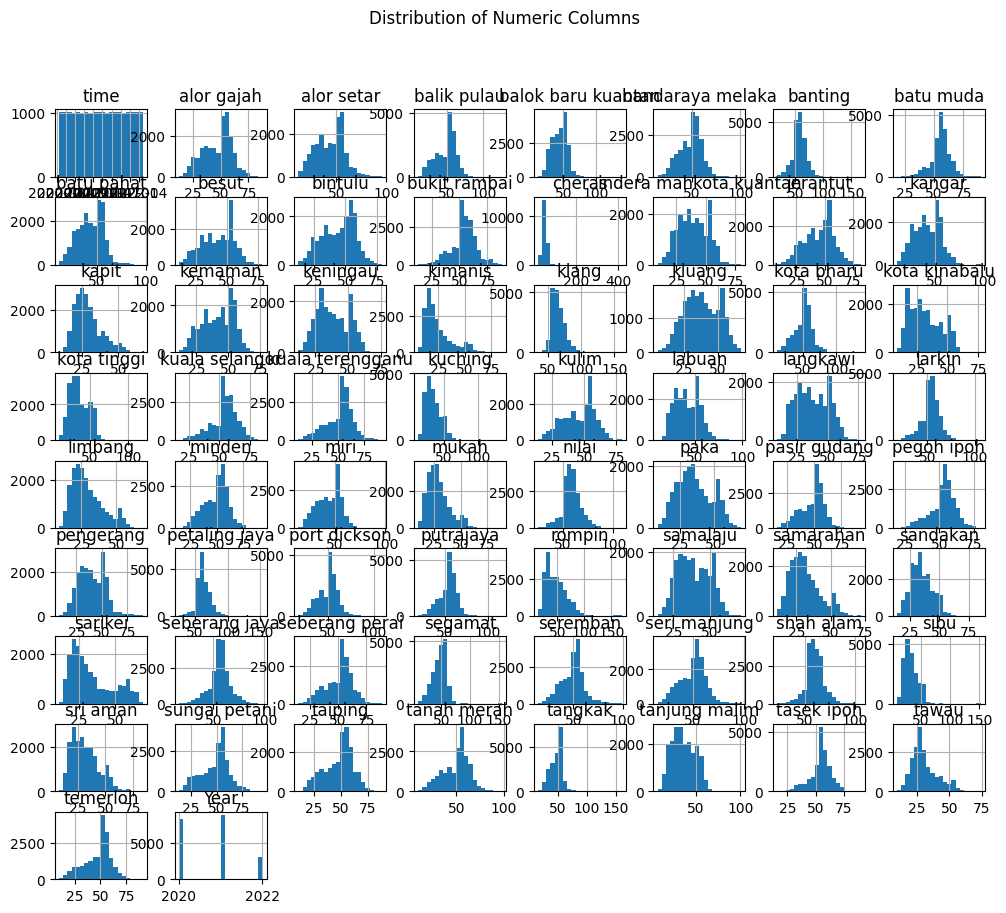

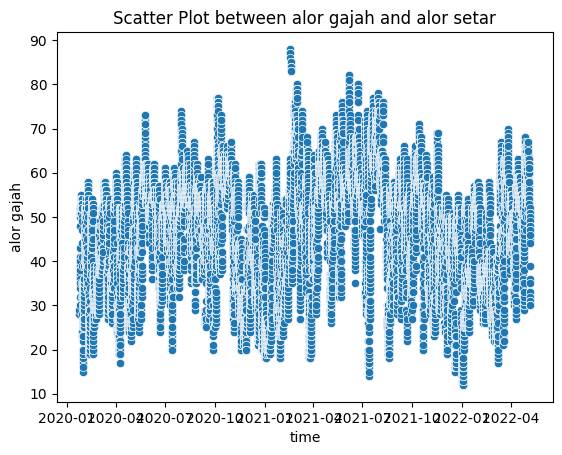

In [ ]:
# Explore distributions using histograms
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Distribution of Numeric Columns")
plt.show()

# Explore relationships between columns using scatter plots and bar charts
# (Example: Assuming 'Column1' and 'Column2' are two numeric columns to be explored)
sns.scatterplot(x='time', y='alor gajah', data=df)
plt.title("Scatter Plot between alor gajah and alor setar")
plt.show()

# # Bar chart example (Assuming 'CategoryColumn' is a categorical column and 'NumericColumn' is a numeric column)
# sns.barplot(x='time', y='alor gajah', data=df)
# plt.title("Bar Chart of alor gajah by time")
# plt.show()



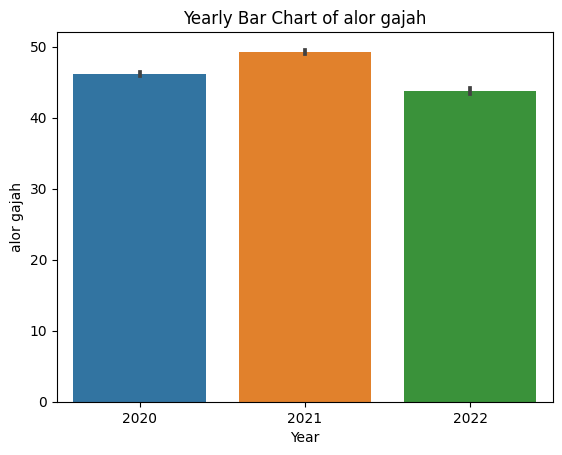

<ipython-input-24-1208c52d53ef>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Quarter', y='alor gajah', data=df, ci=None)  # ci=None to remove error bars


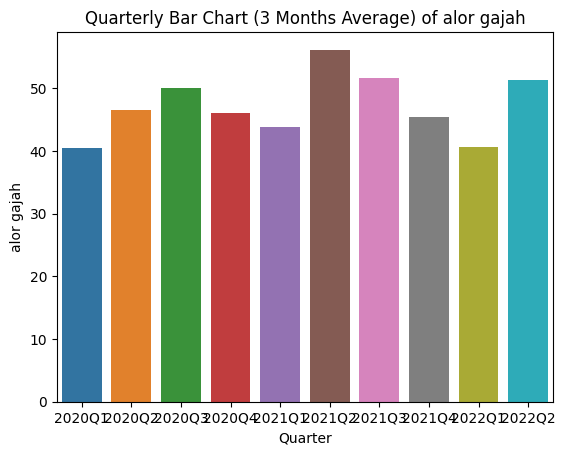

In [ ]:
# Extract the year from the datetime column
df['Year'] = df['time'].dt.year
df['Quarter'] = df['time'].dt.to_period("Q")

sns.barplot(x='Year', y='alor gajah', data=df)
plt.title("Yearly Bar Chart of alor gajah")
plt.show()

sns.barplot(x='Quarter', y='alor gajah', data=df, ci=None)  # ci=None to remove error bars
plt.title("Quarterly Bar Chart (3 Months Average) of alor gajah")
plt.show()

From boxplot above, we can see that there are outliers. So we can remove outliers to have a better view for boxplot.

<ipython-input-29-d45f8c4838d9>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_outliers = df_no_outliers[abs(z_scores) < threshold]


Numeric Column Statistics (No Outliers):
         alor gajah    alor setar   balik pulau  balok baru kuantan  \
count  17182.000000  17182.000000  17182.000000        17182.000000   
mean      47.295786     43.309295     48.458648           43.896408   
std       12.257735     13.820916     13.599745           10.778351   
min       15.000000     13.000000     11.000000           11.000000   
25%       38.000000     32.000000     38.000000           36.000000   
50%       50.000000     45.000000     52.000000           44.231154   
75%       56.000000     54.000000     58.000000           52.000000   
max       85.000000     87.000000     90.000000           78.000000   

       bandaraya melaka       banting     batu muda    batu pahat  \
count      17182.000000  17182.000000  17182.000000  17182.000000   
mean          48.889930     57.057223     55.335655     43.122853   
std           10.348658     10.390119      7.495328     11.922102   
min           16.000000     21.000000     3

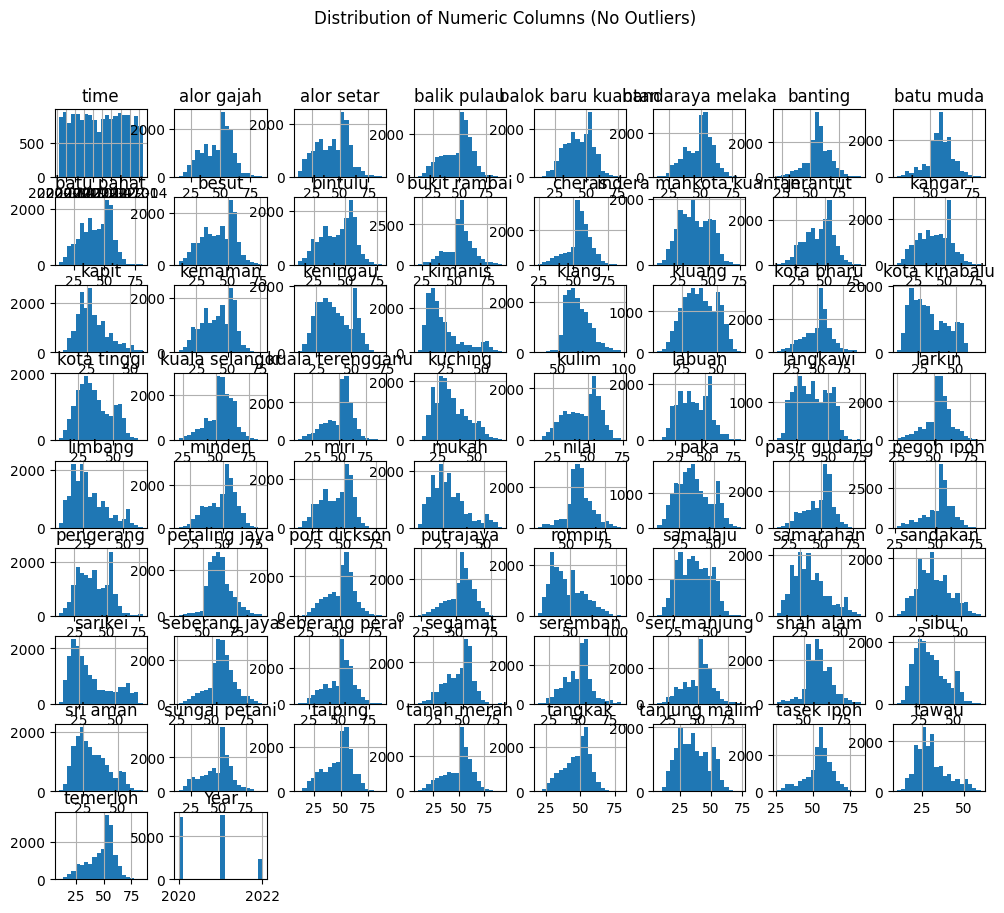

In [ ]:
# Identify numeric columns (excluding the datetime column)
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Function to remove outliers using Z-score
def remove_outliers_zscore(df, columns, threshold=3):
    df_no_outliers = df.copy()
    for column in columns:
        z_scores = (df[column] - df[column].mean()) / df[column].std()
        df_no_outliers = df_no_outliers[abs(z_scores) < threshold]
    return df_no_outliers

# Remove outliers from numeric columns (excluding the datetime column)
df_no_outliers = remove_outliers_zscore(df, numeric_columns)

# Display basic statistics for numeric columns after removing outliers
numeric_stats_no_outliers = df_no_outliers.describe()
print("Numeric Column Statistics (No Outliers):")
print(numeric_stats_no_outliers)

# Explore distributions using histograms after removing outliers
df_no_outliers.hist(figsize=(12, 10), bins=20)
plt.suptitle("Distribution of Numeric Columns (No Outliers)")
plt.show()

### Analysis of the boxplots.
1. Since we have outliers for all the 5 numerical variables, instead of mean value, we will take median value for analysis.
2. 50% of monthly rent is lower than or equal to RM 1,400 per month.
3. 50% of the units have less than or equal to 3 rooms.
4. 50% of the units have 1 parking or no parking.
5. 50% of the units have less than or equal to 2 bathrooms.
6. 50% of the units have less than or equal to 886 square feet size.


### Analysis of the histograms.
1. Mode of monthly rent is RM1500 per month.
2. Mode of rooms is 3 rooms.
3. Mode of parking is 1 parking.
4. Mode of bathrooms is 2 bathrooms.
5. Mode of size is 850 square feets.

Remarks: Further discussion needed to find out why histograms created using seaborn and matplotlib are different, in fact both codes should do the same task of creating histograms to visualize the distribution of numeric columns with ouliers been removed.

###3. Explore relationship between columns using scatter plots, bar charts etc.

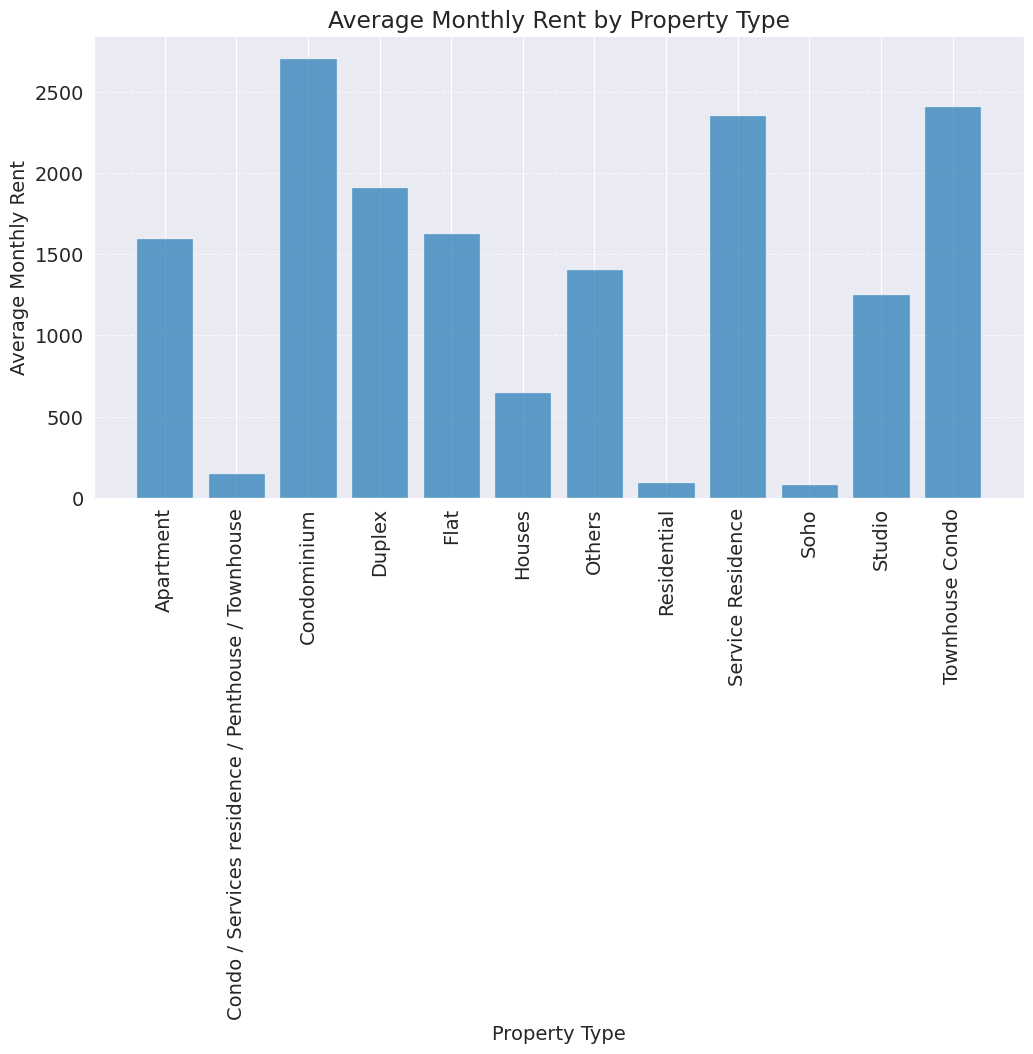

In [ ]:
# Group the data by property type and calculate the average monthly rent for each property type
property_type_rent = df.groupby('property_type')['monthly_rent'].mean().reset_index()

# Extract the property type and average monthly rent columns
property_types = property_type_rent['property_type']
average_monthly_rent = property_type_rent['monthly_rent']

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(property_types, average_monthly_rent, align='center', alpha=0.7)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title("Average Monthly Rent by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Average Monthly Rent")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

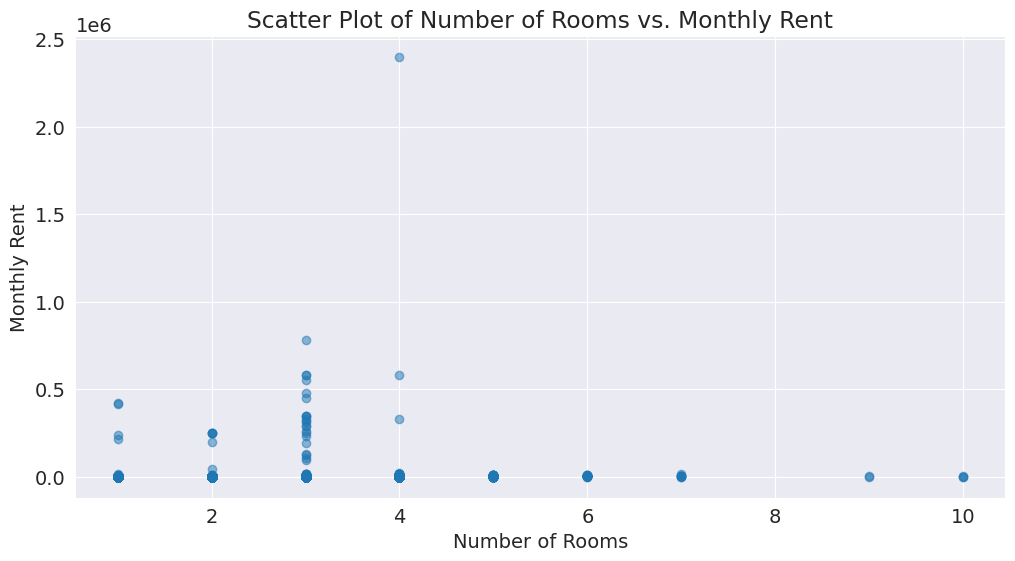

In [ ]:
# Extract the 'rooms' and 'monthly_rent' columns
rooms = df['rooms']
monthly_rent = df['monthly_rent']

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(rooms, monthly_rent, alpha=0.5)
plt.title("Scatter Plot of Number of Rooms vs. Monthly Rent")
plt.xlabel("Number of Rooms")
plt.ylabel("Monthly Rent")
plt.grid(True)
plt.show()

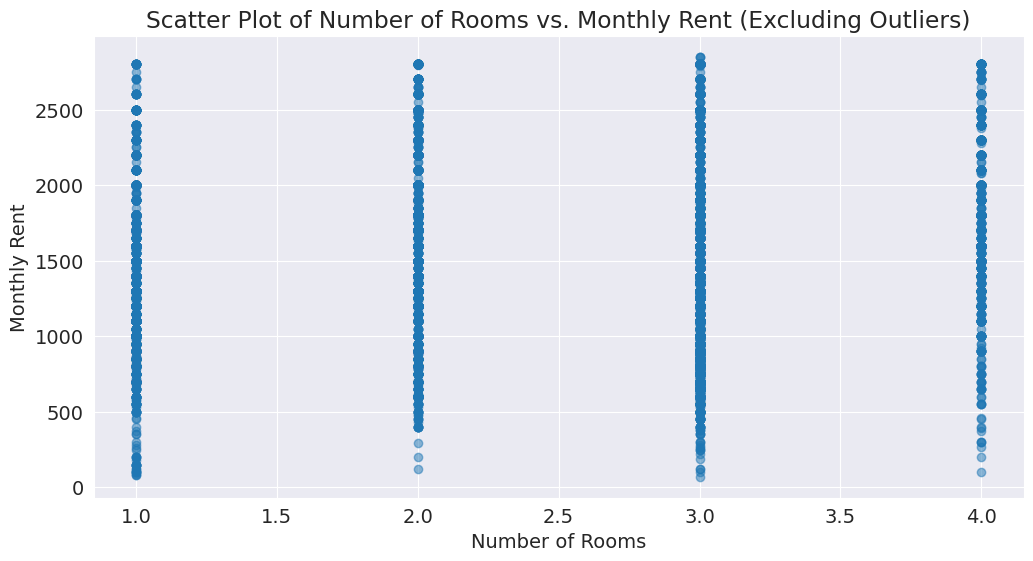

In [ ]:
# Extract the 'rooms' and 'monthly_rent' columns after exclude outliers
rooms_no_outliers = df_no_outliers['rooms']
monthly_rent_no_outliers = df_no_outliers['monthly_rent']

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(rooms_no_outliers, monthly_rent_no_outliers, alpha=0.5)
plt.title("Scatter Plot of Number of Rooms vs. Monthly Rent (Excluding Outliers)")
plt.xlabel("Number of Rooms")
plt.ylabel("Monthly Rent")
plt.grid(True)
plt.show()

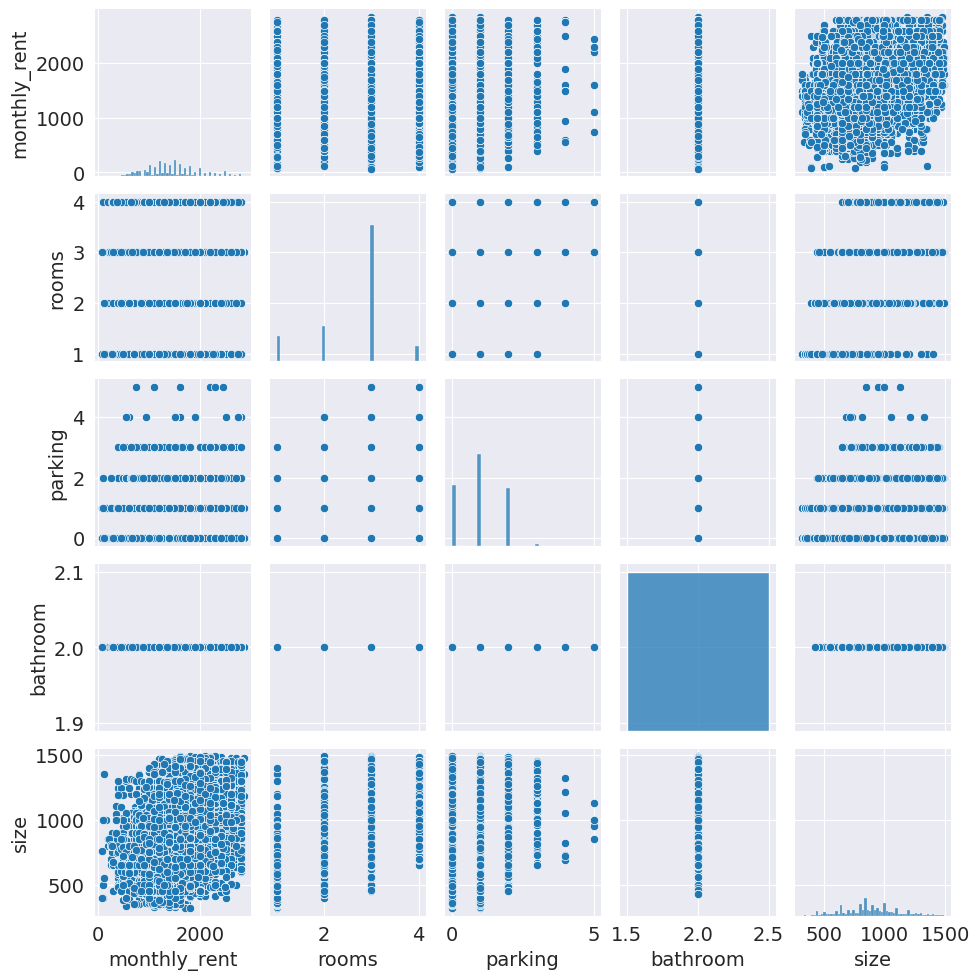

In [ ]:
# Create a pair plot
sns.pairplot(df_no_outliers[num_cols], height=2)
plt.show()

Correlation Heatmap:

- Positive Correlation: Cells with a positive correlation (close to 1) are usually displayed in warm colors (e.g., red or orange). A **high positive** value indicates a strong positive relationship. This means that as **one variable increases, the other tends to increase** as well.
- Negative Correlation: Cells with a negative correlation (close to -1) are usually displayed in cool colors (e.g., blue or green). A **high negative** value indicates a strong negative relationship. This means that as **one variable increases, the other tends to decrease**.

Correlation Coefficient(r) represents the strength and direction of a linear relationship between 2 variables. Common guidelines as below:

- |r| between 0.00 and 0.19: Very weak or no correlation.
- |r| between 0.20 and 0.39: Weak correlation.
- |r| between 0.40 and 0.59: Moderate correlation.
- |r| between 0.60 and 0.79: Strong correlation.
- |r| between 0.80 and 1.00: Very strong or perfect correlation.

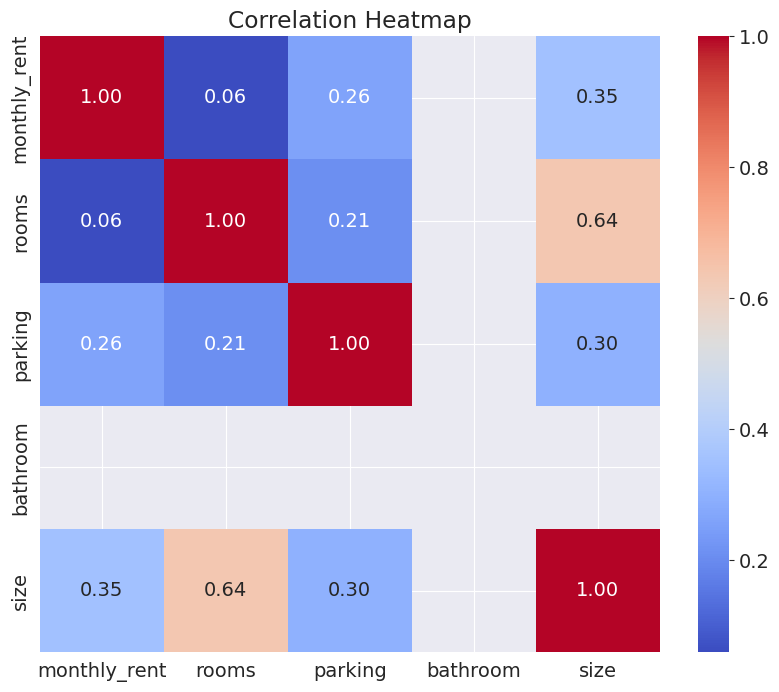

In [ ]:
# Create a correlation matrix
correlation_matrix = df_no_outliers[num_cols].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Analysis of the Bar Chart, Scatterplot and Heatmap
1. From the bar chart, we know that condominium has the highest average of monthly rent.
2. From the scatterplots (either include or exclude outliers), we can see that the solely number of rooms is not the factor that determine the monthly rental price. Together with the bar chart information, the monthly rental price might be affected by the type of porperty as well.   
3. From the Correlation Heatmap, we can see that size of unit has the most positive relation to the monthly rental price, meaning when size increases, monthly rental price tends to increases. However, it is still weak correlation where r=0.35.

## Asking and Answering Questions

We have created 10 questions about the dataset. Let go through the questions to further understand the dataset.



#### Q1: How many type of property type and list out the property type?

In [ ]:
property_types = df['property_type'].unique()
num_property_types = len(property_types)

print(f"Number of unique property types: {num_property_types}")
print("List of property types:")
for property_type in property_types:
    print(property_type)

Number of unique property types: 12
List of property types:
Condominium
Apartment
Service Residence
Studio
Flat
Duplex
Others
Townhouse Condo
Condo / Services residence / Penthouse / Townhouse
Residential
Houses
Soho


#### Q2: How many type of furnishing status and list out the status?

In [ ]:
furnishing_statuses = df['furnished'].unique()
num_furnishing_statuses = len(furnishing_statuses)

print(f"Number of unique furnishing statuses: {num_furnishing_statuses}")
print("List of furnishing statuses:")
for status in furnishing_statuses:
    print(status)

Number of unique furnishing statuses: 4
List of furnishing statuses:
Fully Furnished
Partially Furnished
Not Furnished
Not Available


#### Q3: How many rental units available by each property type?

In [ ]:
property_type_counts = df['property_type'].value_counts()

print("Number of rental units available by each property type:")
print(property_type_counts)

Number of rental units available by each property type:
Condominium                                           8447
Service Residence                                     5305
Apartment                                             5255
Flat                                                   581
Studio                                                 189
Others                                                  89
Duplex                                                  76
Townhouse Condo                                         35
Condo / Services residence / Penthouse / Townhouse       1
Residential                                              1
Houses                                                   1
Soho                                                     1
Name: property_type, dtype: int64


#### Q4: How many rental units available by each property location?

In [ ]:
location_counts = df['location'].value_counts()

print("Number of rental units available by each property location:")
print(location_counts)

Number of rental units available by each property location:
Kuala Lumpur - Cheras                   1623
Selangor - Kajang                       1022
Kuala Lumpur - Setapak                   973
Selangor - Shah Alam                     970
Selangor - Cyberjaya                     879
                                        ... 
Selangor - 369                             1
Selangor - 43                              1
Selangor - Pulau Indah (Pulau Lumut)       1
Kuala Lumpur - Sungai Penchala             1
Selangor - Puncak Jalil                    1
Name: location, Length: 132, dtype: int64


#### Q5: Make 2 columns with property name and age of property as of now (year 2023).

In [ ]:
# Calculate the age of each property
df['completion_year'] = pd.to_numeric(df['completion_year'], errors='coerce')
df['age_of_property'] = 2023 - df['completion_year']

# Create a new DataFrame with 'prop_name' and 'age_of_property' columns
property_age_df = df[['prop_name', 'age_of_property']]

# Display the DataFrame with property name and age
print(property_age_df)

                           prop_name  age_of_property
0           The Hipster @ Taman Desa              1.0
1                       Segar Courts              NaN
2      Pangsapuri Teratak Muhibbah 2              NaN
3       Sentul Point Suite Apartment              3.0
4                    Arte Mont Kiara              NaN
...                              ...              ...
19986         Pangsapuri Gapura Bayu              NaN
19987                         BSP 21              5.0
19988               Ameera Residence              NaN
19989            The Arc @ Cyberjaya              NaN
19990    Tamarind Suites @ Cyberjaya              7.0

[19981 rows x 2 columns]


<ipython-input-77-c48a37ff78a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['completion_year'] = pd.to_numeric(df['completion_year'], errors='coerce')
<ipython-input-77-c48a37ff78a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_of_property'] = 2023 - df['completion_year']


### Q6: What is the monthly rental price range for each property type?

In [ ]:
property_type_ranges = df.groupby('property_type')['monthly_rent'].agg(['min', 'max'])

# Rename the columns for clarity
property_type_ranges = property_type_ranges.rename(columns={'min': 'min_rent', 'max': 'max_rent'})

# Display the monthly rental price range for each property type
print(property_type_ranges)

                                                    min_rent   max_rent
property_type                                                          
Apartment                                               80.0   310000.0
Condo / Services residence / Penthouse / Townhouse     150.0      150.0
Condominium                                             80.0  2400000.0
Duplex                                                1100.0     7500.0
Flat                                                   250.0   200000.0
Houses                                                 650.0      650.0
Others                                                 150.0     4000.0
Residential                                            100.0      100.0
Service Residence                                       70.0   580000.0
Soho                                                    85.0       85.0
Studio                                                 200.0     5000.0
Townhouse Condo                                        600.0    

 ### Q7: What is the size range for each property type?

In [ ]:
property_type_ranges = df.groupby('property_type')['size'].agg(['min', 'max'])

# Rename the columns for clarity
property_type_ranges = property_type_ranges.rename(columns={'min': 'min_size', 'max': 'max_size'})

# Display the size range for each property type
print(property_type_ranges)

                                                    min_size    max_size
property_type                                                           
Apartment                                                1.0     48010.0
Condo / Services residence / Penthouse / Townhouse     100.0       100.0
Condominium                                              1.0  99999999.0
Duplex                                                 300.0      3488.0
Flat                                                   380.0      1500.0
Houses                                                 300.0       300.0
Others                                                  25.0      3000.0
Residential                                            100.0       100.0
Service Residence                                        1.0      9001.0
Soho                                                   761.0       761.0
Studio                                                 150.0      1400.0
Townhouse Condo                                    

### Q8: What is the monthly rental price range for each property location?

In [ ]:
location_ranges = df.groupby('location')['monthly_rent'].agg(['min', 'max'])

# Rename the columns for clarity
location_ranges = location_ranges.rename(columns={'min': 'min_rent', 'max': 'max_rent'})

# Display the monthly rental price range for each property location
print(location_ranges)

                                     min_rent  max_rent
location                                               
Kuala Lumpur - Ampang                   700.0  419000.0
Kuala Lumpur - Ampang Hilir             700.0   18500.0
Kuala Lumpur - Bandar Damai Perdana     750.0    1800.0
Kuala Lumpur - Bandar Menjalara         999.0    2500.0
Kuala Lumpur - Bandar Tasik Selatan     700.0    1300.0
...                                       ...       ...
Selangor - Subang Jaya                  120.0  480000.0
Selangor - Sungai Buloh                 150.0    2800.0
Selangor - Telok Panglima Garang       1800.0    1800.0
Selangor - USJ                          850.0    1700.0
Selangor - Ulu Klang                   1600.0    4500.0

[132 rows x 2 columns]


### Q9: How many units have at least 3 rooms and 2 bathrooms, and what is their monthly rental price range?

In [ ]:
# Filter the DataFrame for units with at least 3 rooms and 2 bathrooms
filtered_df = df[(df['rooms'] >= 3) & (df['bathroom'] >= 2)]

# Calculate the rental price range for the filtered units
rental_price_range = (filtered_df['monthly_rent'].min(), filtered_df['monthly_rent'].max())

# Calculate the number of units that meet the criteria
num_units = len(filtered_df)

# Display the results
print("Number of units with at least 3 rooms and 2 bathrooms:", num_units)
print("Monthly rental price range for these units:", rental_price_range)

Number of units with at least 3 rooms and 2 bathrooms: 13907
Monthly rental price range for these units: (70.0, 2400000.0)


### Q10: What is the relationship between size of unit and its monthly rental price?

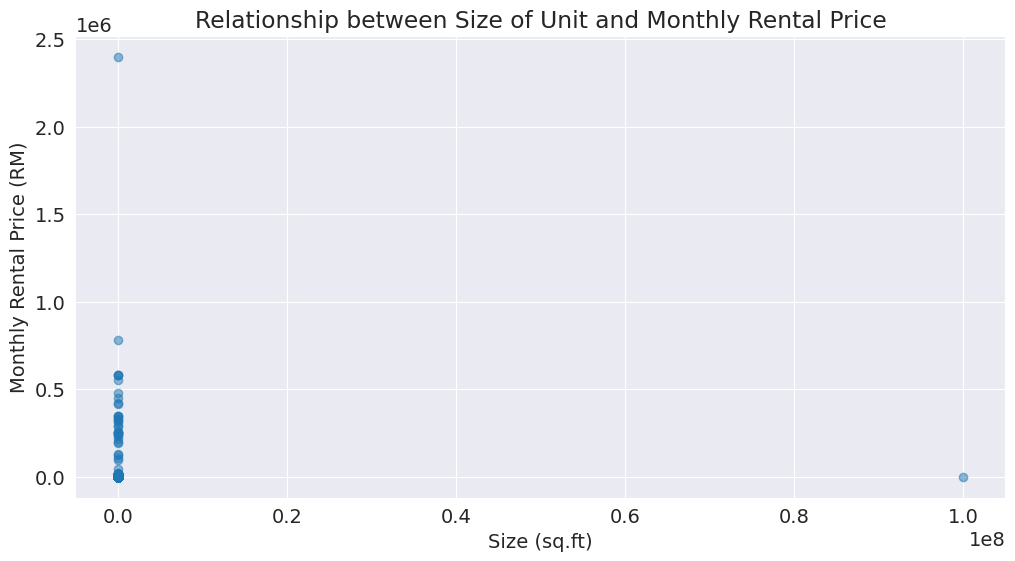

In [ ]:
# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['size'], df['monthly_rent'], alpha=0.5)
plt.title("Relationship between Size of Unit and Monthly Rental Price")
plt.xlabel("Size (sq.ft)")
plt.ylabel("Monthly Rental Price (RM)")
plt.grid(True)

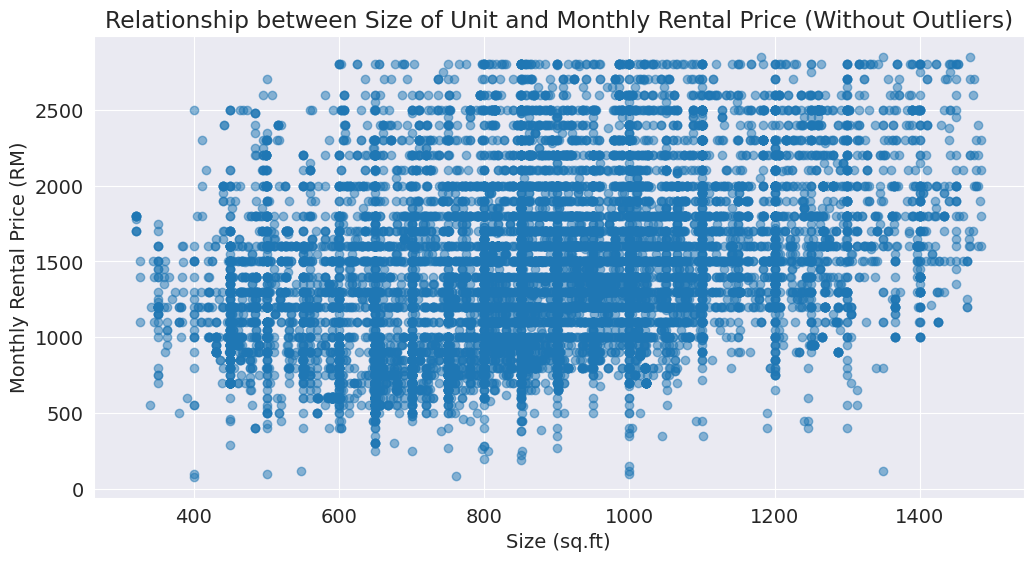

In [ ]:
# Extract the 'size' and 'monthly_rent' columns after exclude outliers
size_no_outliers = df_no_outliers['size']
monthly_rent_no_outliers = df_no_outliers['monthly_rent']

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(size_no_outliers, monthly_rent_no_outliers, alpha=0.5)
plt.title("Relationship between Size of Unit and Monthly Rental Price (Without Outliers)")
plt.xlabel("Size (sq.ft)")
plt.ylabel("Monthly Rental Price (RM)")
plt.grid(True)

From the Correlation Heatmap before, we know that size and monthly rental price has weak positive correlation, where r=0.35.

## Inferences and Conclusion

In this report, we discuss about how to import necessary libraries, understand the data structure, clean the data and focus on analysis regarding how the numerical variables like number of rooms, number of parking, number of bathrooms and size of units can affect the monthly rental price. However, these 4 numerical variables do not show strong correlation to monthly rental price individually. At the same time, we also make a bar chart on average monthly rental price by property type. It shows that condominium has the highest average monthly rental price. It might be due to condominium has more facilities.

More analysis can be done through automated EDA tools in a short time. We will show it in Case Study 2 where three automated EDA tools such as DataPrep, AutoViz and SweetVitz will be discussed.

## References and Future Work

### Reference:
1. Aditya Argawal (2018), Step-by-step Data Preprocessing & EDA, Kaggle, https://www.kaggle.com/code/agrawaladitya/step-by-step-data-preprocessing-eda

2. Alifia C Harmadi (2021, September 26), 10 Things to do when conducting your Exploratory Data Analysis (EDA)
With Python, Medium, https://medium.com/data-folks-indonesia/10-things-to-do-when-conducting-your-exploratory-data-analysis-eda-7e3b2dfbf812

### Future Work:
Analysis of effect of multiple variables on the monthly rental price can be further discussed. Further analysis like predictive analysis and presciptive analysis can be done to forecast the future rental price trend in different areas in Kuala Lumpur and Selangor, Malaysia.